In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime,date
import random

In [9]:
steps_path = "Fitdata/dailySteps_merged.csv"
sleep_path = "Fitdata/sleepDay_merged.csv"

In [10]:
steps_data = pd.read_csv(steps_path)
sleep_data = pd.read_csv(sleep_path)

In [11]:
sleep_data

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [12]:
steps_data

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [13]:
# defining quality of sleep and attaching it to the dataframe
sleep_data["Quality of sleep"] = sleep_data["TotalMinutesAsleep"] / sleep_data["TotalTimeInBed"]

#formatting dates 
sleep_data['SleepDay'] = sleep_data['SleepDay'].astype("datetime64")
steps_data['ActivityDay'] = steps_data['ActivityDay'].astype("datetime64")

sleep_data = sleep_data.rename(columns={'SleepDay': 'Day'})
steps_data = steps_data.rename(columns={'ActivityDay': 'Day'})

In [14]:
# merge
sleep_steps_df = pd.merge(steps_data, sleep_data, how="left", on=['Id','Day'])

In [15]:
# clean merged dataframe
clean_df = sleep_steps_df.drop(columns=['TotalMinutesAsleep', 'TotalTimeInBed','TotalSleepRecords'])
clean_df = clean_df.dropna()
clean_df

,Id,Day,StepTotal,Quality of sleep
0,1503960366,2016-04-12,13162,0.945087
1,1503960366,2016-04-13,10735,0.943489
3,1503960366,2016-04-15,9762,0.932127
4,1503960366,2016-04-16,12669,0.926431
5,1503960366,2016-04-17,9705,0.983146
...,...,...,...,...
901,8792009665,2016-04-30,7174,0.952778
902,8792009665,2016-05-01,1619,0.954459
903,8792009665,2016-05-02,1831,0.981087
904,8792009665,2016-05-03,2421,0.946789


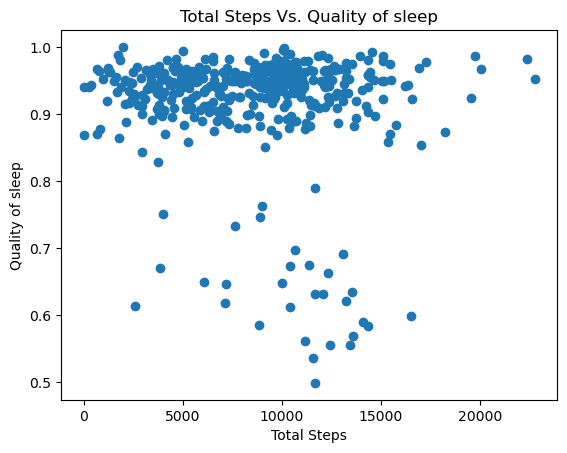

In [16]:
# scatter plot
x = clean_df['StepTotal']
y = clean_df['Quality of sleep']

plt.scatter(x, y, marker="o")

plt.xlabel('Total Steps')
plt.ylabel('Quality of sleep')
plt.title('Total Steps Vs. Quality of sleep')

plt.show()


In [17]:
# looking at the average
average_sleep_quality = clean_df.groupby(['Id']).mean()['Quality of sleep']
average_steps = clean_df.groupby(['Id']).mean()['StepTotal']

In [18]:
average_sleep_steps_df = average_sleep_quality.to_frame()
average_sleep_steps_df['Average Steps'] = average_steps
average_sleep_steps_df = average_sleep_steps_df.rename(columns={'Quality of sleep':'Average Quality of sleep'})
average_sleep_steps_df

,Average Quality of sleep,Average Steps
Id,,
1503960366,0.936385,12405.680000
1644430081,0.882040,7967.750000
1844505072,0.678460,3477.000000
1927972279,0.947008,1490.000000
2026352035,0.941341,5618.678571
2320127002,0.884058,5079.000000
2347167796,0.910370,8533.200000
3977333714,0.633669,11218.000000
4020332650,0.930358,6596.750000


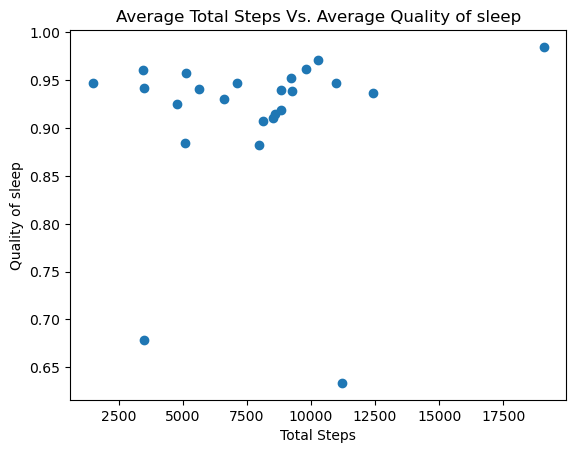

In [19]:
x = average_sleep_steps_df['Average Steps']
y = average_sleep_steps_df['Average Quality of sleep']

plt.scatter(x, y, marker="o")

plt.xlabel('Total Steps')
plt.ylabel('Quality of sleep')
plt.title('Average Total Steps Vs. Average Quality of sleep')

plt.show()

In [33]:
# randomly pick a person to look at
ID_list = clean_df['Id'].tolist()
random_ID = random.choice(ID_list)


In [34]:
# new dataframe for the selected id
random_person_df = clean_df[(clean_df['Id']==random_ID)]
random_person_df

,Id,Day,StepTotal,Quality of sleep
444,4445114986,2016-04-12,3276,0.938731
445,4445114986,2016-04-13,2961,0.911330
446,4445114986,2016-04-14,3974,0.896341
447,4445114986,2016-04-15,7198,0.889182
448,4445114986,2016-04-16,3945,0.925852
449,4445114986,2016-04-17,2268,0.915888
451,4445114986,2016-04-19,2064,0.915094
452,4445114986,2016-04-20,2072,0.950216
453,4445114986,2016-04-21,3809,0.929638
454,4445114986,2016-04-22,6831,0.930456


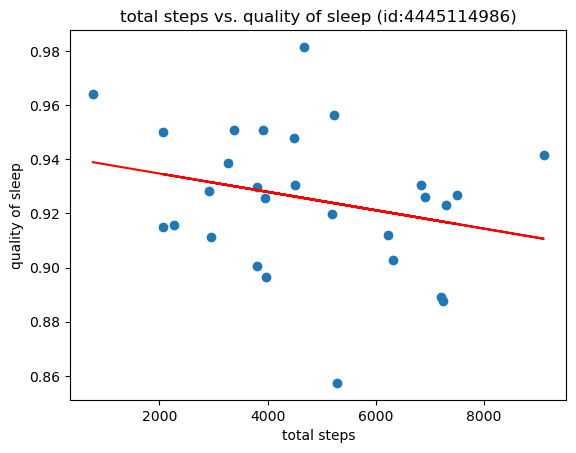

In [35]:
# how this person has been sleeping in a month

x_value = random_person_df['StepTotal']
y_value = random_person_df['Quality of sleep']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")

plt.annotate(line_eq,(10000,0.88),fontsize=15,color="red")

plt.xlabel('total steps')
plt.ylabel('quality of sleep')
plt.title(f'total steps vs. quality of sleep (id:{random_ID})')

plt.show()

In [36]:
# user 8378563200 slept better walking more steps
# user 1503960366 slept worse with more total steps
